In [4]:
%matplotlib inline
import mesa_reader as ms
from glob import glob
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

#Make sure these are the right values!
Msol_to_MJup = 0.0009543
Rsol_to_RJup = 0.10045

9.54169237741e-05


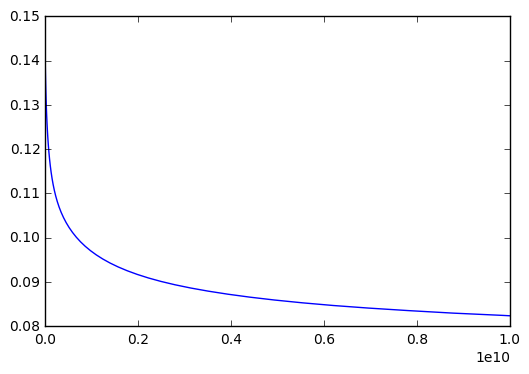

In [18]:
#Interpolate to calculate radius for one core mass at one age
PlanetMasses = [0.1]

dr = '/Users/owner/mesa7184work/star/test_suite/make_planets/models/Mpinit_0.1_MJup_10.0_ME/LOGS_Mpinit_0.1_MJup_10.0_ME'
ls = glob(dr + '/history.data')
filename = ls[-1]
mod = ms.MesaData(filename)
print(mod.data('star_mass')[0])
plt.plot(mod.data('star_age'), mod.data('radius'))

    

In [19]:
#Make an implicit function that provide radius when you give an age
radius_interp = interpolate.interp1d(mod.data('star_age'), mod.data('radius'))
age = 5e9
#5 Gyrs
print(radius_interp(age))

0.0858653101711


In [34]:
#Iterate through all the masses
#Make a list of all the LOG file names
overall_directory = '/Users/bjackson/research/mesa/mwd/make_planets_initial-grid_variable-core/models/'
LOG_file_list = glob(overall_directory + '/*/LOGS/history.data')
print(LOG_file_list[0:1])

['/Users/bjackson/research/mesa/mwd/make_planets_initial-grid_variable-core/models/Mpinit_0.02_MJup_10.00_ME_10_Gyr_old/LOGS/history.data']


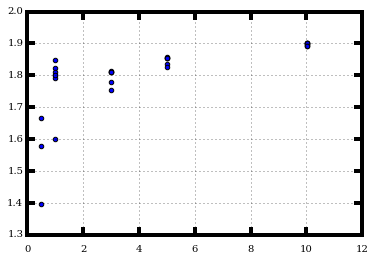

In [66]:
#For each history.data file, add the planet's mass to a mass array.
masses = np.array([])
radii = np.array([])

desired_age = 1e6
for i in range(len(LOG_file_list)):
    mod = ms.MesaData(LOG_file_list[i])
    
    if(max(mod.data('star_age')) >= desired_age):
        
        masses = np.append(masses, mod.data('star_mass')[0]/Msol_to_MJup)
        radius_interp = interpolate.interp1d(mod.data('star_age'), mod.data('radius'))
        radii = np.append(radii, radius_interp(desired_age)/Rsol_to_RJup)

plt.scatter(masses, radii)